In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns

In [4]:
df_neuron = pd.read_pickle('../../../data/data_tables/df_classifier.pkl')
df_morphos = pd.read_pickle('../../../data/data_tables/df_morphos.pkl')

df_neuron = pd.merge(
    df_neuron,
    df_morphos[['segment_id', 'split_index', 'soma_x', 'soma_y', 'soma_z']],
    on=['segment_id', 'split_index'],
)

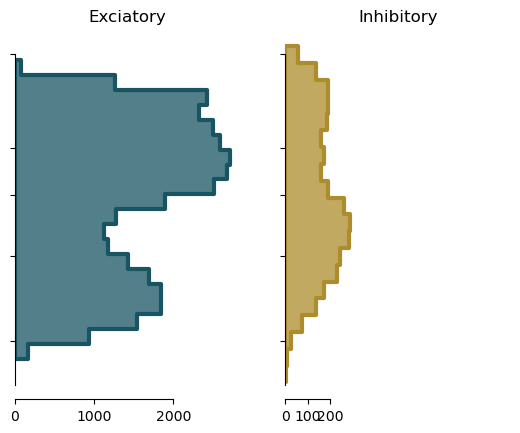

In [4]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=False)

sns.histplot(
    data=df_neuron[df_neuron['ei_prediction'] == 'exc'],
    y='soma_y',
    ax=ax[0],
    bins=20,
    element="step",
    color=[0.092304, 0.32922, 0.38504],
    linewidth=3.0,
)
sns.histplot(
    data=df_neuron[df_neuron['ei_prediction'] == 'inh'],
    y='soma_y',
    ax=ax[1],
    bins=20,
    element="step",
    color=[0.678244, 0.550712, 0.177803],
    linewidth=3.0,
)

sns.despine(trim=10)

ax[0].invert_yaxis()

ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_title('Exciatory')
ax[1].set_title('Inhibitory')

ax[1].set_xlim([0, 1000])

ax[0].set_yticks([0, 227, 340, 489, 693])
# ax[0].set_yticklabels(['Pia', 'L2/3-L4', 'L4-L5', 'L5-L6', 'WM']);
ax[0].set_yticklabels([''] * 5);

# fig.savefig('figures/dist_ei.pdf', bbox_inches='tight', transparent=True)

In [5]:
df_neuron.ei_prediction.value_counts()

exc    33997
inh     3138
Name: ei_prediction, dtype: int64

#### Appendix

In [6]:
colordict = {
    'exc': np.array([0.092304, 0.32922, 0.38504]),
    'inh': np.array([0.678244, 0.550712, 0.177803]),
}

Text(0.5, 0, 'Soma position x, μm')

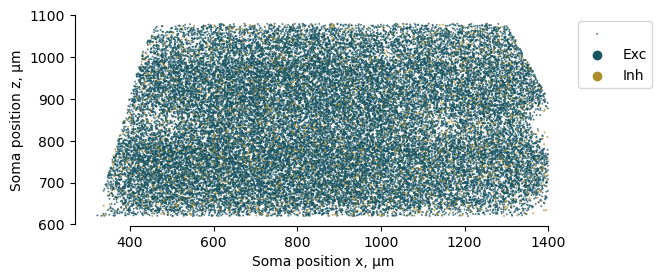

In [7]:
fig, ax = plt.subplots(1, 1)
h = sns.scatterplot(
    data=df_neuron,
    x='soma_x',
    y='soma_z',
    hue='ei_prediction',
    s=2,
    palette=colordict,
    ax=ax,
    alpha=0.75,
    linewidth=0,
    rasterized=True,
)

ax.set_aspect('equal')
sns.despine(trim=10)

plt.legend(title='', labels=['', 'Exc', 'Inh'], bbox_to_anchor=(1, 1))

ax.set_ylabel('Soma position z, μm')
ax.set_xlabel('Soma position x, μm')

# fig.savefig('figures/dist_ei_topview_rast.pdf', bbox_inches='tight', transparent=True, dpi=300)

In [8]:
df_tsne = pd.read_pickle('../../data/df_tsne_appendix.pkl')

In [9]:
df_neuron = pd.merge(
    df_neuron,
    df_tsne[['segment_id', 'split_index', 'tsne_emb_x_exc', 'tsne_emb_y_exc']],
    on=['segment_id', 'split_index'],
)

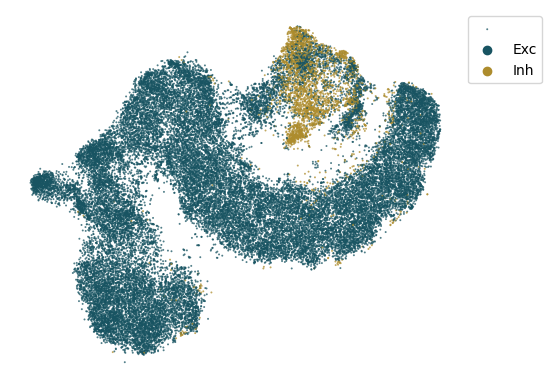

In [10]:
fig, ax = plt.subplots(1, 1)

sns.scatterplot(
    data=df_neuron,
    x='tsne_emb_x_exc',
    y='tsne_emb_y_exc',
    hue='ei_prediction',
    ax=ax,
    s=2,
    palette=colordict,
    alpha=0.75,
    linewidth=0,
    rasterized=True,
)

ax.axis('off')
ax.set_aspect('equal')

plt.legend(title='', labels=['', 'Exc', 'Inh'], bbox_to_anchor=(1, 1));
# fig.savefig('figures/dist_ei_tsne_rast.pdf', bbox_inches='tight', transparent=True, dpi=300)